In [1]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import pandas as pd
from tqdm import tqdm


In [2]:
import utils.data as dt

test_transform = transforms.Compose([
    transforms.ToTensor(),  
])

# Define transformations for training dataset (includes augmentation techniques)
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3))  
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# Load training and test data from CSV files
train_df = pd.read_csv('train.csv') 
test_df = pd.read_csv('test.csv')

train_size = int(0.2 * len(train_df))
val_size = len(train_df) - train_size
train_df_split = train_df.sample(n=train_size, random_state=42)
val_df_split = train_df.drop(train_df_split.index)

train_dataset = dt.constructImageDataseTrain(dataframe=train_df_split, img_dir='train', transform=test_transform)
val_dataset = dt.constructImageDataseTrain(dataframe=val_df_split, img_dir='train', transform=test_transform)
test_dataset = dt.constructImageDataseTest(dataframe=test_df, img_dir='test', transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


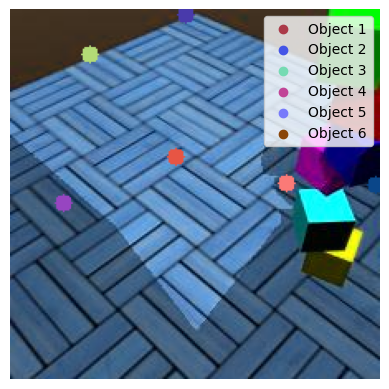

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from utils.physical_analysis import *  # Consider specifying what exactly you need from this module for clarity and optimization
import utils.model_helper as mh

# Convert the DataLoader to an iterator and get the first batch
dataiter = iter(train_loader)
images, labels = next(dataiter)  # Get the first batch of images and labels

# Check if the batch contains enough images
if images.size(0) >= 5:  # Ensure there are at least 5 images
    # Convert PyTorch tensor to NumPy array for processing
    image_np = images[4].permute(1, 2, 0).numpy()  # Convert tensor to HWC (Height, Width, Channels) format
    image_np = (image_np * 255).astype(np.uint8)  # Convert to uint8 format with values between 0 and 255

    # Compute centroids
    centroids = mh.compute_centroids_component(image_np)

    # Visualize centroids on the image
    mh.visualize_centroids(image_np, centroids)
else:
    print("Batch does not contain 5 images.")


In [11]:
import cv2
import numpy as np

image = cv2.imread("train/54.jpg")


stability_model = mh.StabilityModel(threshold=0.9)


centroids, stability_predictions = stability_model.analyze_image(image)

# Print the results
print("Centroid coordinates:", centroids)
print("Stability predictions:", stability_predictions)
    


Centroid coordinates: [[94, 104], [7, 41], [16, 50], [16, 57], [20, 81], [0, 102], [182, 130], [121, 125], [137, 127], [209, 131], [147, 130], [209, 137], [208, 151], [131, 148], [183, 170], [128, 164], [208, 167], [208, 174], [208, 183], [202, 205], [218, 204], [128, 222]]
Stability predictions: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False]


train
Image 1 size: torch.Size([3, 224, 224])
Displaying image 1, label: 2
Image 2 size: torch.Size([3, 224, 224])
Displaying image 2, label: 3
Image 3 size: torch.Size([3, 224, 224])
Displaying image 3, label: 3
Image 4 size: torch.Size([3, 224, 224])
Displaying image 4, label: 4
Image 5 size: torch.Size([3, 224, 224])
Displaying image 5, label: 3


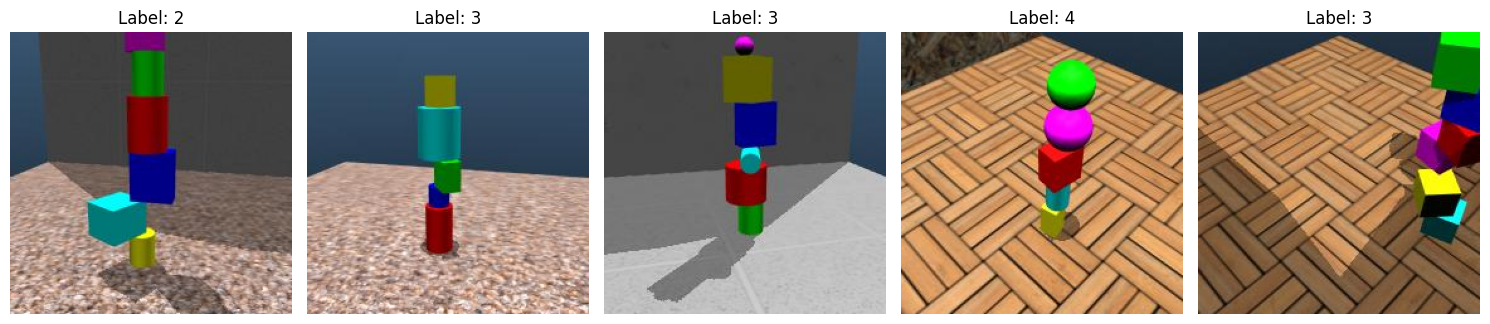


Image 1 size: torch.Size([3, 224, 224])
Displaying image 1, label: 1
Image 2 size: torch.Size([3, 224, 224])
Displaying image 2, label: 1
Image 3 size: torch.Size([3, 224, 224])
Displaying image 3, label: 5
Image 4 size: torch.Size([3, 224, 224])
Displaying image 4, label: 1
Image 5 size: torch.Size([3, 224, 224])
Displaying image 5, label: 2


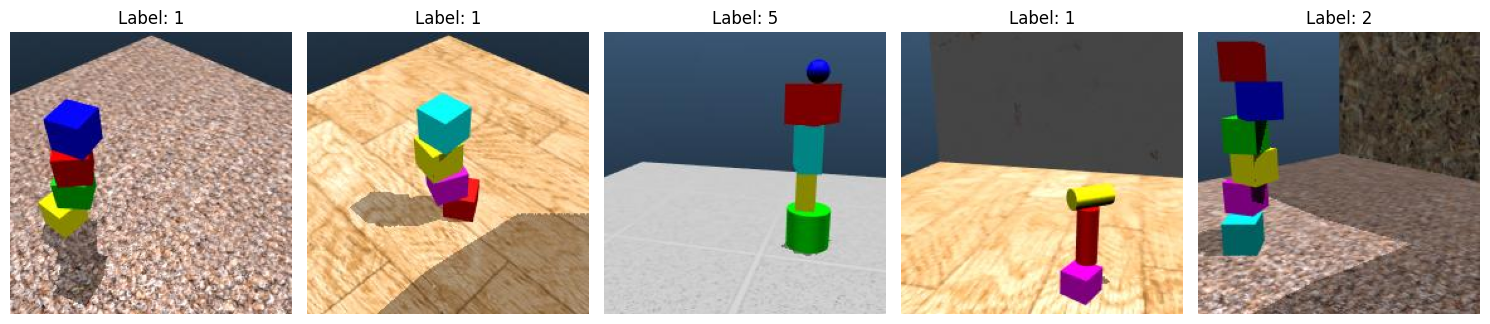

Image 1 size: torch.Size([3, 224, 224])
Displaying image 1, label: 95
Image 2 size: torch.Size([3, 224, 224])
Displaying image 2, label: 706
Image 3 size: torch.Size([3, 224, 224])
Displaying image 3, label: 2854
Image 4 size: torch.Size([3, 224, 224])
Displaying image 4, label: 3093
Image 5 size: torch.Size([3, 224, 224])
Displaying image 5, label: 4283


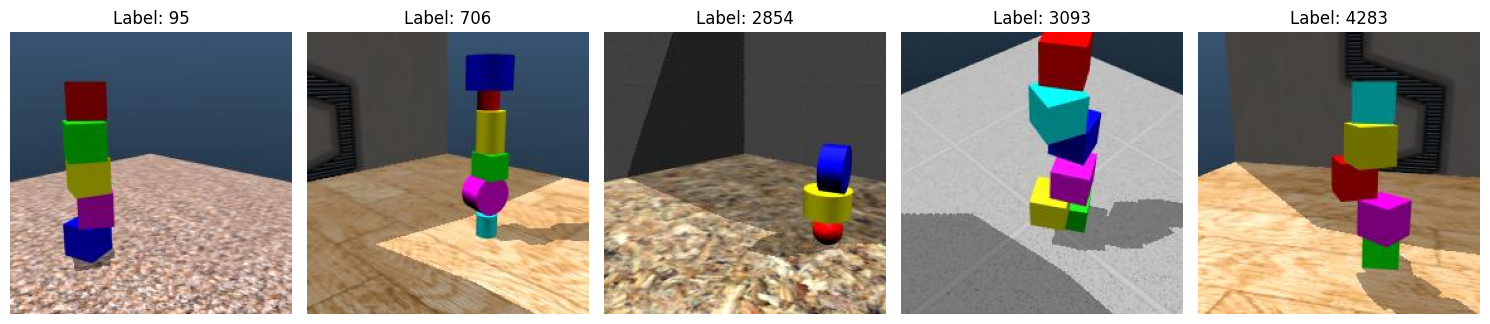

In [10]:
import utils.visualization as vi



print("train")
vi.show_image2(train_loader)

print("")

#val

vi.show_image2(val_loader)

vi.show_image2(test_loader)

